In [14]:
import sys
sys.path.append('../src')
import argparse
from operator import itemgetter
import nltk
from features import sent2labels, sent2features
from active_learning_model import ALModel
from random_sampling_model import RSModel
import matplotlib.pyplot as plt
import numpy as np
import import_conll2003
%pylab inline --no-import-all

Populating the interactive namespace from numpy and matplotlib


In [3]:
nltk.download("conll2002")

[nltk_data] Downloading package conll2002 to /root/nltk_data...
[nltk_data]   Unzipping corpora/conll2002.zip.


True

In [10]:
labeled_size = 10
pool_size = -1 * labeled_size - 1
test_size = -1

In [16]:
# Create Dataset
labeled_sents = list(import_conll2003.iob_sents('../data/eng.train'))[0:labeled_size]
pool_sents = list(import_conll2003.iob_sents('../data/eng.train'))[labeled_size:labeled_size+pool_size]
test_sents = list(import_conll2003.iob_sents('../data/eng.testa'))[0:test_size]

# Convert sentence to features
X_labeled = [sent2features(s) for s in labeled_sents]
y_labeled = [sent2labels(s) for s in labeled_sents]
X_pool = [sent2features(s) for s in pool_sents]
y_pool = [sent2labels(s) for s in pool_sents]
X_test = [sent2features(s) for s in test_sents]
y_test = [sent2labels(s) for s in test_sents]

# Training
al_model = ALModel(X_labeled, y_labeled, X_pool, y_pool, 5)
rs_model = RSModel(X_labeled, y_labeled, X_pool, y_pool, 5)

al_score = []
rs_score = []
al_score.append(al_model.evaluation(X_test, y_test))
rs_score.append(rs_model.evaluation(X_test, y_test))
for _ in range(50):
    al_model.query_selection()
    al_model.fit()
    al_score.append(al_model.evaluation(X_test, y_test))
    rs_model.query_selection()
    rs_model.fit()
    rs_score.append(rs_model.evaluation(X_test, y_test))

In [5]:
al_score = [0.25951349344146396, 0.28070177726956114, 0.52577438033533885, 0.52411321121240817, 0.56094323156586345, 0.57736239159494984, 0.58902551474663956, 0.60764988533361042, 0.62700494542734198, 0.63121685394359528, 0.63256437149701716, 0.65097005574225364, 0.66213616678896581, 0.66145494775294233, 0.66273189333340765, 0.66943826280416141, 0.66830457464766746, 0.67363396038898993, 0.67908161398564493, 0.68414214964206266, 0.68041855045266875, 0.68274366686591426, 0.68716691734553537, 0.68561613760905638, 0.68673128487991386, 0.69860735424338583, 0.70271438253410656, 0.69731880718085515, 0.700299808242417, 0.70054942228080785, 0.70488879462630105, 0.70654756815772868, 0.71910003853086213, 0.71610691423172013, 0.72026597144725102, 0.72145250271232086, 0.71684054702183342, 0.72005699536795786, 0.72288045521107447, 0.72399031654922641, 0.72701649386519351, 0.73182504485097888, 0.73158896297892029, 0.73002435292885681, 0.73846733550649102, 0.73406577938534912, 0.7371571843564042, 0.73679975121303454, 0.73874845880193718, 0.74006282595770334, 0.73771517744731152, 0.73972782204526011, 0.74270655387794249, 0.74708085199806717, 0.74666733315717915, 0.74667345625855941, 0.75299054638046947, 0.75482255598462522, 0.7558347336900153, 0.7571052983084775, 0.75755378235707427, 0.75790220045116663, 0.76356003296078834, 0.76109380091567269, 0.76013022757324566, 0.76227160428219631, 0.76100786969032552, 0.76414868029147609, 0.76270486383900959, 0.76372668599656646, 0.76502061530827592, 0.7643712794337747, 0.76779516176535823, 0.77105635817720186, 0.76903492256199946, 0.76742663242355658, 0.76744870032383683, 0.76905820568183514, 0.76943837659894065, 0.76915214609805893, 0.76977755235612577, 0.77396670485513919, 0.77040238467511468, 0.77229538573906042, 0.77681648641190204, 0.77934265475210718, 0.77870810557043313, 0.77945222438937356, 0.77890396822944485, 0.77918399015904249, 0.7731280294449101, 0.77247730790134317, 0.77126946190339007, 0.77335400884808025, 0.76781284316948695, 0.76756418828651185, 0.77377775246847835, 0.77355821357508958, 0.77248646282226197, 0.77472713849875308, 0.77404413503652369, 0.7719897010489094, 0.77359366602027291, 0.77312698352185727, 0.77297138346493799, 0.77620984804981441, 0.77793914040345558, 0.77648507816282331, 0.77746872223365149, 0.77633099138996409, 0.77894311260358085, 0.7784552404222449, 0.77651039072285277, 0.77926108623265267, 0.77992217048632362, 0.77709364562514649, 0.78011886308031209, 0.77885780491295142, 0.78160526316208623, 0.78174735564911713, 0.78312426633332033, 0.78119139749447519, 0.78167008266710725, 0.78410706992848611, 0.78077422883390135, 0.78397330981711943, 0.78535234421627031, 0.78549523760618489, 0.78564833377226617, 0.7857029946243872, 0.78418473625064322, 0.78490691340842278, 0.78596001771263579, 0.78565305501344074, 0.78594450862598464, 0.78702609270999913, 0.78740739219623546, 0.7859477038607201, 0.79060705876421644, 0.78903901096601248, 0.78809120988568626, 0.78968455381663316, 0.78809281321757885, 0.79360395575984133, 0.79016335502643131, 0.7918532660205736, 0.79195938431217028, 0.7905856046244728, 0.7907771398988751, 0.7894600553586274, 0.78877258741184486, 0.7869448541991636, 0.78714548385255545, 0.78962789341818862, 0.78826328364283105, 0.7904292374258991, 0.79299828277687856, 0.79366568675328486, 0.79362349405424748, 0.79451722265807023, 0.79205309104929089, 0.79298052742718916, 0.79488880379209859, 0.79450557850122461, 0.7974751544294526, 0.79533038382021926, 0.80057898660885318, 0.80186596352187789, 0.80131793713521793, 0.80412829666593955, 0.80594972053494152, 0.80720216714389104, 0.80393782432356664, 0.8029204107320006, 0.80600172019055549, 0.80577241515141163, 0.80652922945667926, 0.80664148672988101, 0.8089147012694442, 0.80605932048793139, 0.80661469905625138, 0.80698433325692265, 0.80724211591564443, 0.80389993102984703, 0.80514704919122815, 0.80465156710146246, 0.80597116151596448, 0.80512497122464288, 0.80750108451429659, 0.80785989978423178, 0.80723593692591045, 0.80707532250498437, 0.80838649022521814, 0.80780209435621275, 0.81097935442994296, 0.80791805039677256, 0.81010103176322568, 0.80833878321865082, 0.80773091562851251, 0.80794952655285512, 0.80857970895577613, 0.8038131518972006, 0.80996788152564414, 0.80545325115156452, 0.80901526289114378, 0.80434839700231642, 0.80996117805290957, 0.80079059297780697, 0.80361662061120875, 0.80823322064731673, 0.80794272423421842, 0.80920493918134195, 0.80740954709266965, 0.80238148983561752, 0.8084509768933501, 0.81152893808880355, 0.80680494684284565, 0.8091188405398746, 0.81368925107967904, 0.81007836776829933, 0.80750651485655622, 0.80892608110600595, 0.80767820395367507, 0.80661168863122878, 0.80775238034276253, 0.80965232809394494, 0.81048344641257031, 0.80856357298313186, 0.81013705253256962, 0.81364064792730673, 0.81467277866571786, 0.81541942890546948, 0.813359420842797, 0.81110633789093345, 0.81420847319454026, 0.80925778740179399, 0.81659500252883677, 0.8138161764238514, 0.81544266941554933, 0.81231772160072235, 0.81035752048421184, 0.814570085563321, 0.81148555373419962, 0.81255477030650469, 0.81304405981752725, 0.81181885526909003, 0.81279954008593469, 0.81052832177592338, 0.81541608927075038, 0.81245798445760042, 0.81424915501880324, 0.81056782210560085, 0.81048962571406624, 0.81180129790655531, 0.80931750110704603, 0.8109628711287159, 0.81192951487878418, 0.81401021889669722, 0.81222896357992991, 0.8182010533088, 0.81038050634728254, 0.81241398078973126, 0.81443595971107208, 0.81341288104056031, 0.81396709329101902, 0.82107425341592666, 0.81518868144714041, 0.81324237775853414, 0.81080361743942786, 0.81321752780842316, 0.81215503750702123, 0.81692755933881644, 0.815758171230619, 0.81338886309538283, 0.81866167894531294, 0.81916990167418169, 0.81422307824374729, 0.81762516401831675, 0.81470288718094186, 0.81362027747943766, 0.81436095636560668, 0.81345710960993201, 0.81999236765547134, 0.81599519049556624, 0.81467888475573846, 0.81463480828702572, 0.81477460552369618, 0.81656284039805782, 0.8148465756080272, 0.81604161936346864, 0.81455430004330021, 0.81553572446416756, 0.81337615791265927, 0.81564394430083054, 0.81418171107721815, 0.81565648552120995, 0.8167692842347658, 0.81396024908075204, 0.81334898572815528, 0.81513962088244363, 0.81649409885810509]
rs_score = [0.25951349344146396, 0.3165541019931592, 0.52616492453758201, 0.5367636386746768, 0.56681475872885978, 0.57433626112966241, 0.58832142435072254, 0.61439990267336064, 0.62852709765153481, 0.63653463072664707, 0.63932137861850546, 0.65755656929103135, 0.65941180347600548, 0.65944771630637888, 0.66872079979439758, 0.67005443197784464, 0.67366513438817055, 0.67776541580751226, 0.67920164904750746, 0.68440423227734204, 0.68388109788773244, 0.68122874056637861, 0.69001230740442054, 0.69396628430891771, 0.68895436320289583, 0.69776416931193752, 0.69704147433502728, 0.69742408391625599, 0.70199944575464179, 0.70778097437696019, 0.70944988339352544, 0.70816457404387723, 0.71733630957538996, 0.7184711317190835, 0.71852830224150799, 0.72043572313319182, 0.71843406119053821, 0.72050889781438332, 0.7228277444307265, 0.72546263269262146, 0.72950832492971862, 0.73226875219743559, 0.7333209302514363, 0.73570789633296774, 0.73948950194307272, 0.73690407302950334, 0.73751008128814777, 0.73521835845197037, 0.73721128083473886, 0.74011548449265252, 0.74374103410380199, 0.74280232099808297, 0.74359694659871234, 0.74727918914443481, 0.75147142384051546, 0.75015552398519703, 0.75429907530937346, 0.75278347526373812, 0.75502176875828608, 0.76002694480073685, 0.76137171784602153, 0.75992928340575205, 0.75791395038209219, 0.75988649589823898, 0.76281016757291065, 0.76012609870096659, 0.76409101580252903, 0.76120476080907384, 0.76340917850460088, 0.76465061290199232, 0.76262363389549659, 0.76497753046861605, 0.76764961886173366, 0.76462021424240312, 0.76769161094145688, 0.76620240749620627, 0.76870045588171843, 0.77029577532966531, 0.77184553312649229, 0.77284415892090763, 0.77102447582425082, 0.77343680270558246, 0.7765654177747171, 0.77664794116084734, 0.77788707761795328, 0.77723428704737485, 0.77736551527973896, 0.77435678637815475, 0.77940710822875947, 0.77356188201858389, 0.77122228134598481, 0.77274991386177649, 0.77237788926695861, 0.76992762705209117, 0.76974203357631121, 0.76949511713912899, 0.77259277949256533, 0.7713945185293728, 0.77524940106104656, 0.77147419851919796, 0.77432327659381284, 0.77414975185048773, 0.77494967361777212, 0.77356930230102872, 0.77079297568464067, 0.77546165120194943, 0.7772027344638246, 0.77525758674989986, 0.77557138658269187, 0.77870969231388887, 0.77911569076571996, 0.77893800336155672, 0.77676107098899727, 0.77893291094411976, 0.77675749101682645, 0.78025611671804662, 0.78065411379999861, 0.78209933423602973, 0.78163175939552032, 0.78226606768838436, 0.78120451179832062, 0.78229172115023993, 0.78391226357027743, 0.78194874730994202, 0.7820031446161323, 0.78297477909008584, 0.78310994979286153, 0.78137353270395449, 0.78655388904346712, 0.78084045245210121, 0.78558388625151532, 0.7805401004090684, 0.78291102204210394, 0.78779027022440962, 0.7825381675806411, 0.78796593036541729, 0.78900138469485259, 0.78862424147183463, 0.78768521594847174, 0.78567242774679014, 0.78816699473397323, 0.79018285663688115, 0.78725926327768125, 0.79268799454268646, 0.79221476818826075, 0.78791969418562524, 0.79270662799184211, 0.79232977256493409, 0.79167904714679593, 0.79075129389131749, 0.78950884045679437, 0.78999599810196353, 0.79226160952763691, 0.79117073363365786, 0.79025001670429385, 0.78675588720207035, 0.79150191228582023, 0.7946727119936956, 0.79224000903286362, 0.79371962710185151, 0.79307192713580232, 0.79346617431523314, 0.79147130434102475, 0.79683020040360153, 0.79892194097723124, 0.79520736114805579, 0.80370922297169978, 0.8021032090017608, 0.80445690357708266, 0.8063012160220685, 0.80511489182282558, 0.80526606938355583, 0.80570443734584363, 0.8062693838803433, 0.80684930589594794, 0.8045177161246102, 0.80791288163100095, 0.80551985209877885, 0.80846549773925669, 0.80679079946281063, 0.80664263608537801, 0.80726387236188069, 0.80674099450508219, 0.80758073117091678, 0.80172676636438234, 0.80602181980649956, 0.80765755393300076, 0.80267837926030872, 0.81019251745680454, 0.80673147810637691, 0.80587418764234398, 0.80849790941227806, 0.80186651988365198, 0.80711974195870195, 0.8099017848065172, 0.80328044726288228, 0.80857056205570588, 0.8104277786789712, 0.80881041538070653, 0.80947752404737405, 0.80417398847570543, 0.80929932430895635, 0.80929274056435341, 0.80827391561158701, 0.81087021143021987, 0.80718548330651807, 0.80237258925867994, 0.8036871576656105, 0.80970274479188831, 0.81067246895205669, 0.8074392937825855, 0.80723995117606995, 0.8110060317633665, 0.80975192191579959, 0.8096281305371742, 0.80733719115781089, 0.80991009618976872, 0.8095370231701976, 0.80961248807706265, 0.80955944718781048, 0.80721506279105026, 0.80821324481009249, 0.81164220134035681, 0.80948434501324695, 0.80896938641801264, 0.80617139346179989, 0.81476794260883312, 0.80873370656912358, 0.81263131896571272, 0.81075588608722393, 0.81232274368558477, 0.81041705800617347, 0.81042144524551829, 0.81539455229352031, 0.81042380337978226, 0.80852306302245247, 0.81423975478659461, 0.8124652541510744, 0.8124270424298784, 0.81201490613285132, 0.80950453527546207, 0.81430912231023189, 0.81059927642663931, 0.81017532253200075, 0.81117572855787268, 0.813778352940145, 0.81065430663046045, 0.81192696858101143, 0.81270432870310627, 0.81232592056445574, 0.81290819703058648, 0.81049128624277766, 0.81115838569941845, 0.80886595012849793, 0.81177227504171068, 0.8092244672796316, 0.81108987549445688, 0.8131126295915323, 0.81196708355008507, 0.80864519185539419, 0.8125133310649284, 0.81591280561383217, 0.81465515560623469, 0.81244434650979847, 0.81422060153163422, 0.81470761195910124, 0.81360910080800253, 0.81360222816040484, 0.81396626859058419, 0.81152986727085652, 0.81409928019608269, 0.81407623795392126, 0.81275935047861991, 0.81230754631435531, 0.81429921578013931, 0.81561086228399815, 0.81620835998230712, 0.81633108701168244, 0.8124862473627591, 0.81226739821005267, 0.81439475221136548, 0.81220452056891224, 0.81753454530673297, 0.81674117151656922, 0.8135000804535254, 0.8157354810592341, 0.81436408632809987, 0.81351621819280351, 0.81527403026356737, 0.81397712321821469, 0.81567479702145507, 0.81460093946560896, 0.81486776793125093, 0.81738800495201458, 0.81426522299242055, 0.81570157972031254, 0.8154840753453324, 0.81440118243184867, 0.81604668633528865, 0.81816286633241608, 0.81445132911485618]

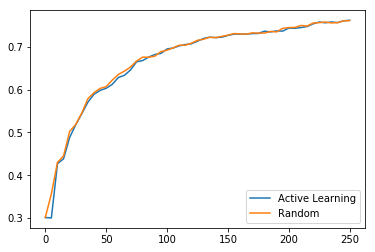

In [17]:
left = np.arange(len(rs_score)) * 5
p1 = plt.plot(left, al_score)
p2 = plt.plot(left, rs_score)
plt.legend((p1[0], p2[0]), ("Active Learning", "Random"), loc=4)